In [1]:
import torchy
import numpy as np

c:\Users\Thien Le\miniconda3\envs\webdev\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


# Basic Operations

In [2]:
x = torchy.Tensor(np.array([1, 2, 3, 4, 5]))
y = torchy.Tensor([5, 4, 3, 2, 1])
x, y

(tensor(array([1, 2, 3, 4, 5]), device=cpu, requires_grad=False),
 tensor(array([5, 4, 3, 2, 1]), device=cpu, requires_grad=False))

In [3]:
x + y

tensor(array([6, 6, 6, 6, 6]), device=cpu, requires_grad=False)

In [4]:
x - y

tensor(array([-4, -2,  0,  2,  4]), device=cpu, requires_grad=False)

In [5]:
x * y

tensor(array([5, 8, 9, 8, 5]), device=cpu, requires_grad=False)

In [6]:
x / y

tensor(array([0.2, 0.5, 1. , 2. , 5. ]), device=cpu, requires_grad=False)

# Numpy Interface

In [7]:
torchy.maximum(x, y)

tensor(array([5, 4, 3, 4, 5]), device=cpu, requires_grad=False)

In [8]:
torchy.minimum(x, y)

tensor(array([1, 2, 3, 2, 1]), device=cpu, requires_grad=False)

In [9]:
torchy.cos(x)

tensor(array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219]), device=cpu, requires_grad=False)

In [10]:
torchy.sin(x)

tensor(array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427]), device=cpu, requires_grad=False)

In [11]:
torchy.tan(x)

tensor(array([ 1.55740772, -2.18503986, -0.14254654,  1.15782128, -3.38051501]), device=cpu, requires_grad=False)

In [12]:
torchy.arccos(torchy.cos(x))

tensor(array([1.        , 2.        , 3.        , 2.28318531, 1.28318531]), device=cpu, requires_grad=False)

In [13]:
torchy.arcsin(torchy.sin(x))

tensor(array([ 1.        ,  1.14159265,  0.14159265, -0.85840735, -1.28318531]), device=cpu, requires_grad=False)

In [14]:
torchy.arctan(torchy.tan(x))

tensor(array([ 1.        , -1.14159265, -0.14159265,  0.85840735, -1.28318531]), device=cpu, requires_grad=False)

In [15]:
torchy.equal(x, y)

tensor(array([False, False,  True, False, False]), device=cpu, requires_grad=False)

# Basic Gradients Calculations

# Neural Network

In [16]:
import torchy.nn as nn 
from torchy.nn import Linear, ReLU, MSELoss
from torchy.optim import Adam

In [227]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = Linear(1, 32)
        self.linear2 = Linear(32, 32)
        self.linear3 = Linear(32, 1)
        self.relu = ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [228]:
epochs = 2000
lr = 0.1

model = Network()
criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=lr)

In [229]:
x = torchy.Tensor([[i] for i in range(-100, 100)])
gt = x ** 2 + x + 1

In [230]:
losses = []
for i in range(epochs):
    optimizer.zero_grad()
    y = model(x)
    loss = criterion(y, gt)
    loss.backward()
    optimizer.step()
    losses.append(np.log(loss.item()))

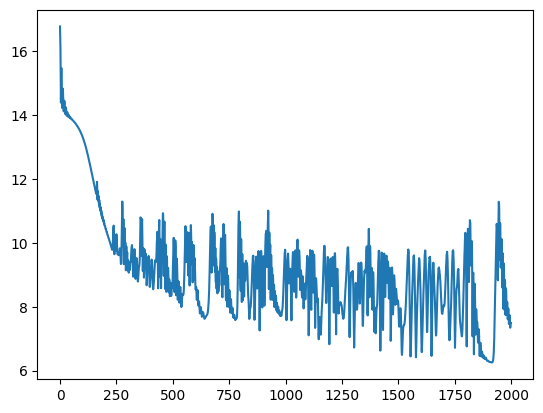

In [231]:
import matplotlib.pyplot as plt 

plt.plot(losses)

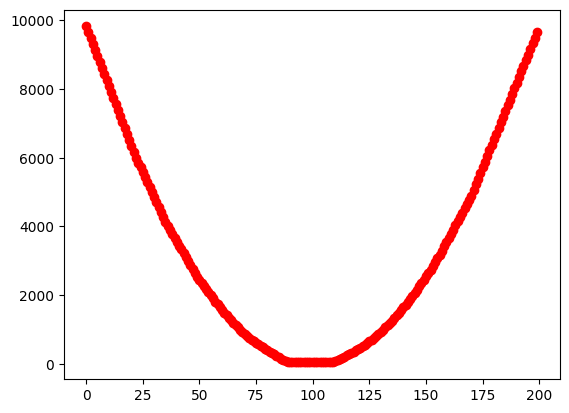

In [234]:
plt.scatter(np.arange(200), model(x)._array, c='r')
#plt.scatter(np.arange(200), gt._array, c='b')
plt.show()